In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y_train_5d

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
X_train

array([[ 0.        ,  0.06914427,  0.06696532, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.06372119,  0.06263999, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.0612489 ,  0.05700162, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.        ,  0.06380094,  0.07144512, ...,  0.333     ,
         0.        ,  0.        ],
       [ 1.        ,  0.06531621,  0.06657913, ...,  0.522     ,
         0.761     ,  0.935     ],
       [ 1.        ,  0.067629  ,  0.06943694, ...,  0.534     ,
         0.46      ,  0.548     ]])

In [5]:
X_train.shape

(34481, 11)

In [6]:
X_test.shape

(17240, 11)

In [7]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [8]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [9]:
# Fit the model
history = model.fit(
    X_train, y_train_30d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6923 - acc: 0.5082 - val_loss: 0.6901 - val_acc: 0.5407
Epoch 2/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6899 - acc: 0.5267 - val_loss: 0.6885 - val_acc: 0.5398
Epoch 3/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6884 - acc: 0.5528 - val_loss: 0.6871 - val_acc: 0.5604
Epoch 4/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6867 - acc: 0.5691 - val_loss: 0.6854 - val_acc: 0.5679
Epoch 5/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6849 - acc: 0.5791 - val_loss: 0.6838 - val_acc: 0.5684
Epoch 6/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6833 - acc: 0.5911 - val_loss: 0.6825 - val_acc: 0.5795
Epoch 7/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6820 - acc: 0.5928 - val_loss: 0.6816 -

27584/27584 [==============================] - 0s 9us/step - loss: 0.6514 - acc: 0.6228 - val_loss: 0.6586 - val_acc: 0.5949
Epoch 60/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6511 - acc: 0.6230 - val_loss: 0.6584 - val_acc: 0.5952
Epoch 61/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6508 - acc: 0.6240 - val_loss: 0.6590 - val_acc: 0.5919
Epoch 62/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6505 - acc: 0.6235 - val_loss: 0.6590 - val_acc: 0.5916
Epoch 63/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6503 - acc: 0.6241 - val_loss: 0.6593 - val_acc: 0.5898
Epoch 64/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6500 - acc: 0.6236 - val_loss: 0.6584 - val_acc: 0.5926
Epoch 65/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6498 - acc: 0.6233 - val_loss: 0.6581 - val_acc: 0.5933
Epoch 66/1000
27584/27584 [=============

27584/27584 [==============================] - 0s 9us/step - loss: 0.6441 - acc: 0.6276 - val_loss: 0.6539 - val_acc: 0.5932
Epoch 118/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6440 - acc: 0.6275 - val_loss: 0.6540 - val_acc: 0.5929
Epoch 119/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6440 - acc: 0.6267 - val_loss: 0.6538 - val_acc: 0.5933
Epoch 120/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6439 - acc: 0.6266 - val_loss: 0.6541 - val_acc: 0.5927
Epoch 121/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6439 - acc: 0.6268 - val_loss: 0.6533 - val_acc: 0.5945
Epoch 122/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6438 - acc: 0.6286 - val_loss: 0.6535 - val_acc: 0.5934
Epoch 123/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6438 - acc: 0.6276 - val_loss: 0.6530 - val_acc: 0.5949
Epoch 124/1000
27584/27584 [======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6424 - acc: 0.6284 - val_loss: 0.6536 - val_acc: 0.5911
Epoch 176/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6424 - acc: 0.6283 - val_loss: 0.6525 - val_acc: 0.5926
Epoch 177/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6424 - acc: 0.6281 - val_loss: 0.6531 - val_acc: 0.5916
Epoch 178/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6424 - acc: 0.6282 - val_loss: 0.6526 - val_acc: 0.5927
Epoch 179/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6424 - acc: 0.6274 - val_loss: 0.6528 - val_acc: 0.5926
Epoch 180/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6423 - acc: 0.6282 - val_loss: 0.6535 - val_acc: 0.5903
Epoch 181/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6423 - acc: 0.6278 - val_loss: 0.6526 - val_acc: 0.5927
Epoch 182/1000
27584/27584 [======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6419 - acc: 0.6279 - val_loss: 0.6530 - val_acc: 0.5910
Epoch 234/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6418 - acc: 0.6280 - val_loss: 0.6529 - val_acc: 0.5919
Epoch 235/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6418 - acc: 0.6278 - val_loss: 0.6522 - val_acc: 0.5937
Epoch 236/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6418 - acc: 0.6282 - val_loss: 0.6531 - val_acc: 0.5914
Epoch 237/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6418 - acc: 0.6278 - val_loss: 0.6533 - val_acc: 0.5910
Epoch 238/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6418 - acc: 0.6278 - val_loss: 0.6525 - val_acc: 0.5926
Epoch 239/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6418 - acc: 0.6290 - val_loss: 0.6527 - val_acc: 0.5919
Epoch 240/1000
27584/27584 [======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6415 - acc: 0.6276 - val_loss: 0.6530 - val_acc: 0.5911
Epoch 292/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6415 - acc: 0.6279 - val_loss: 0.6533 - val_acc: 0.5888
Epoch 293/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6415 - acc: 0.6285 - val_loss: 0.6533 - val_acc: 0.5905
Epoch 294/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6415 - acc: 0.6282 - val_loss: 0.6524 - val_acc: 0.6006
Epoch 295/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6414 - acc: 0.6281 - val_loss: 0.6546 - val_acc: 0.5862
Epoch 296/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6415 - acc: 0.6291 - val_loss: 0.6532 - val_acc: 0.5910
Epoch 297/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6415 - acc: 0.6287 - val_loss: 0.6523 - val_acc: 0.6016
Epoch 298/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6412 - acc: 0.6290 - val_loss: 0.6529 - val_acc: 0.5913
Epoch 350/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6412 - acc: 0.6283 - val_loss: 0.6534 - val_acc: 0.5876
Epoch 351/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6412 - acc: 0.6287 - val_loss: 0.6534 - val_acc: 0.5881
Epoch 352/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6412 - acc: 0.6291 - val_loss: 0.6542 - val_acc: 0.5871
Epoch 353/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6412 - acc: 0.6296 - val_loss: 0.6534 - val_acc: 0.5887
Epoch 354/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6412 - acc: 0.6288 - val_loss: 0.6533 - val_acc: 0.5882
Epoch 355/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6412 - acc: 0.6289 - val_loss: 0.6523 - val_acc: 0.6014
Epoch 356/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6410 - acc: 0.6283 - val_loss: 0.6535 - val_acc: 0.5887
Epoch 408/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6410 - acc: 0.6281 - val_loss: 0.6524 - val_acc: 0.5985
Epoch 409/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6410 - acc: 0.6295 - val_loss: 0.6523 - val_acc: 0.5982
Epoch 410/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6409 - acc: 0.6295 - val_loss: 0.6524 - val_acc: 0.5987
Epoch 411/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6410 - acc: 0.6289 - val_loss: 0.6532 - val_acc: 0.5876
Epoch 412/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6410 - acc: 0.6296 - val_loss: 0.6520 - val_acc: 0.6019
Epoch 413/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6410 - acc: 0.6284 - val_loss: 0.6532 - val_acc: 0.5876
Epoch 414/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6408 - acc: 0.6295 - val_loss: 0.6526 - val_acc: 0.5904
Epoch 466/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6408 - acc: 0.6296 - val_loss: 0.6528 - val_acc: 0.5913
Epoch 467/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6407 - acc: 0.6289 - val_loss: 0.6539 - val_acc: 0.5876
Epoch 468/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6408 - acc: 0.6293 - val_loss: 0.6527 - val_acc: 0.5914
Epoch 469/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6407 - acc: 0.6297 - val_loss: 0.6523 - val_acc: 0.5971
Epoch 470/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6408 - acc: 0.6283 - val_loss: 0.6528 - val_acc: 0.5916
Epoch 471/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6407 - acc: 0.6295 - val_loss: 0.6523 - val_acc: 0.5953
Epoch 472/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6406 - acc: 0.6294 - val_loss: 0.6529 - val_acc: 0.5891
Epoch 524/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6406 - acc: 0.6294 - val_loss: 0.6519 - val_acc: 0.6014
Epoch 525/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6406 - acc: 0.6295 - val_loss: 0.6528 - val_acc: 0.5888
Epoch 526/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6405 - acc: 0.6298 - val_loss: 0.6528 - val_acc: 0.5894
Epoch 527/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6405 - acc: 0.6296 - val_loss: 0.6513 - val_acc: 0.6114
Epoch 528/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6406 - acc: 0.6295 - val_loss: 0.6529 - val_acc: 0.5891
Epoch 529/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6405 - acc: 0.6299 - val_loss: 0.6522 - val_acc: 0.5952
Epoch 530/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6404 - acc: 0.6295 - val_loss: 0.6518 - val_acc: 0.6037
Epoch 582/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6404 - acc: 0.6303 - val_loss: 0.6529 - val_acc: 0.5891
Epoch 583/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6404 - acc: 0.6307 - val_loss: 0.6527 - val_acc: 0.5898
Epoch 584/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6403 - acc: 0.6299 - val_loss: 0.6524 - val_acc: 0.5921
Epoch 585/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6404 - acc: 0.6310 - val_loss: 0.6531 - val_acc: 0.5890
Epoch 586/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6404 - acc: 0.6304 - val_loss: 0.6518 - val_acc: 0.6024
Epoch 587/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6403 - acc: 0.6308 - val_loss: 0.6515 - val_acc: 0.6058
Epoch 588/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6402 - acc: 0.6312 - val_loss: 0.6519 - val_acc: 0.5963
Epoch 640/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6402 - acc: 0.6308 - val_loss: 0.6519 - val_acc: 0.5969
Epoch 641/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6402 - acc: 0.6312 - val_loss: 0.6520 - val_acc: 0.5953
Epoch 642/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6402 - acc: 0.6300 - val_loss: 0.6520 - val_acc: 0.5971
Epoch 643/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6402 - acc: 0.6303 - val_loss: 0.6524 - val_acc: 0.5924
Epoch 644/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6402 - acc: 0.6301 - val_loss: 0.6531 - val_acc: 0.5898
Epoch 645/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6402 - acc: 0.6311 - val_loss: 0.6529 - val_acc: 0.5908
Epoch 646/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6400 - acc: 0.6313 - val_loss: 0.6523 - val_acc: 0.5924
Epoch 698/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6400 - acc: 0.6313 - val_loss: 0.6517 - val_acc: 0.6004
Epoch 699/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6400 - acc: 0.6323 - val_loss: 0.6521 - val_acc: 0.5917
Epoch 700/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6399 - acc: 0.6304 - val_loss: 0.6512 - val_acc: 0.6107
Epoch 701/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6399 - acc: 0.6320 - val_loss: 0.6526 - val_acc: 0.5888
Epoch 702/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6400 - acc: 0.6308 - val_loss: 0.6526 - val_acc: 0.5897
Epoch 703/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6399 - acc: 0.6319 - val_loss: 0.6516 - val_acc: 0.6036
Epoch 704/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6398 - acc: 0.6318 - val_loss: 0.6513 - val_acc: 0.6043
Epoch 756/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6398 - acc: 0.6323 - val_loss: 0.6523 - val_acc: 0.5901
Epoch 757/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6398 - acc: 0.6321 - val_loss: 0.6514 - val_acc: 0.6023
Epoch 758/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6398 - acc: 0.6312 - val_loss: 0.6514 - val_acc: 0.6024
Epoch 759/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6398 - acc: 0.6320 - val_loss: 0.6521 - val_acc: 0.5907
Epoch 760/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6397 - acc: 0.6309 - val_loss: 0.6521 - val_acc: 0.5900
Epoch 761/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6397 - acc: 0.6314 - val_loss: 0.6517 - val_acc: 0.5932
Epoch 762/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6396 - acc: 0.6326 - val_loss: 0.6512 - val_acc: 0.6053
Epoch 814/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6396 - acc: 0.6318 - val_loss: 0.6516 - val_acc: 0.5934
Epoch 815/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6396 - acc: 0.6329 - val_loss: 0.6523 - val_acc: 0.5916
Epoch 816/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6396 - acc: 0.6314 - val_loss: 0.6511 - val_acc: 0.6045
Epoch 817/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6317 - val_loss: 0.6506 - val_acc: 0.6124
Epoch 818/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6326 - val_loss: 0.6520 - val_acc: 0.5916
Epoch 819/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6396 - acc: 0.6325 - val_loss: 0.6508 - val_acc: 0.6111
Epoch 820/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6325 - val_loss: 0.6509 - val_acc: 0.6062
Epoch 872/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6314 - val_loss: 0.6517 - val_acc: 0.5927
Epoch 873/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6314 - val_loss: 0.6517 - val_acc: 0.5923
Epoch 874/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6322 - val_loss: 0.6529 - val_acc: 0.5916
Epoch 875/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6323 - val_loss: 0.6513 - val_acc: 0.6033
Epoch 876/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6319 - val_loss: 0.6514 - val_acc: 0.5959
Epoch 877/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6395 - acc: 0.6322 - val_loss: 0.6515 - val_acc: 0.5948
Epoch 878/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6394 - acc: 0.6323 - val_loss: 0.6517 - val_acc: 0.5919
Epoch 930/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6393 - acc: 0.6325 - val_loss: 0.6510 - val_acc: 0.6010
Epoch 931/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6393 - acc: 0.6336 - val_loss: 0.6515 - val_acc: 0.5929
Epoch 932/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6393 - acc: 0.6316 - val_loss: 0.6514 - val_acc: 0.5936
Epoch 933/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6393 - acc: 0.6335 - val_loss: 0.6522 - val_acc: 0.5930
Epoch 934/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6393 - acc: 0.6333 - val_loss: 0.6505 - val_acc: 0.6119
Epoch 935/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6393 - acc: 0.6321 - val_loss: 0.6524 - val_acc: 0.5927
Epoch 936/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6391 - acc: 0.6333 - val_loss: 0.6529 - val_acc: 0.5916
Epoch 988/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6392 - acc: 0.6322 - val_loss: 0.6503 - val_acc: 0.6114
Epoch 989/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6392 - acc: 0.6328 - val_loss: 0.6510 - val_acc: 0.5971
Epoch 990/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6392 - acc: 0.6324 - val_loss: 0.6507 - val_acc: 0.6072
Epoch 991/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6392 - acc: 0.6327 - val_loss: 0.6506 - val_acc: 0.6090
Epoch 992/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6392 - acc: 0.6324 - val_loss: 0.6516 - val_acc: 0.5952
Epoch 993/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6392 - acc: 0.6327 - val_loss: 0.6517 - val_acc: 0.5948
Epoch 994/1000
27584/27584 [=======

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000111EA6D3A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000111EB9B52E8>]], dtype=object)

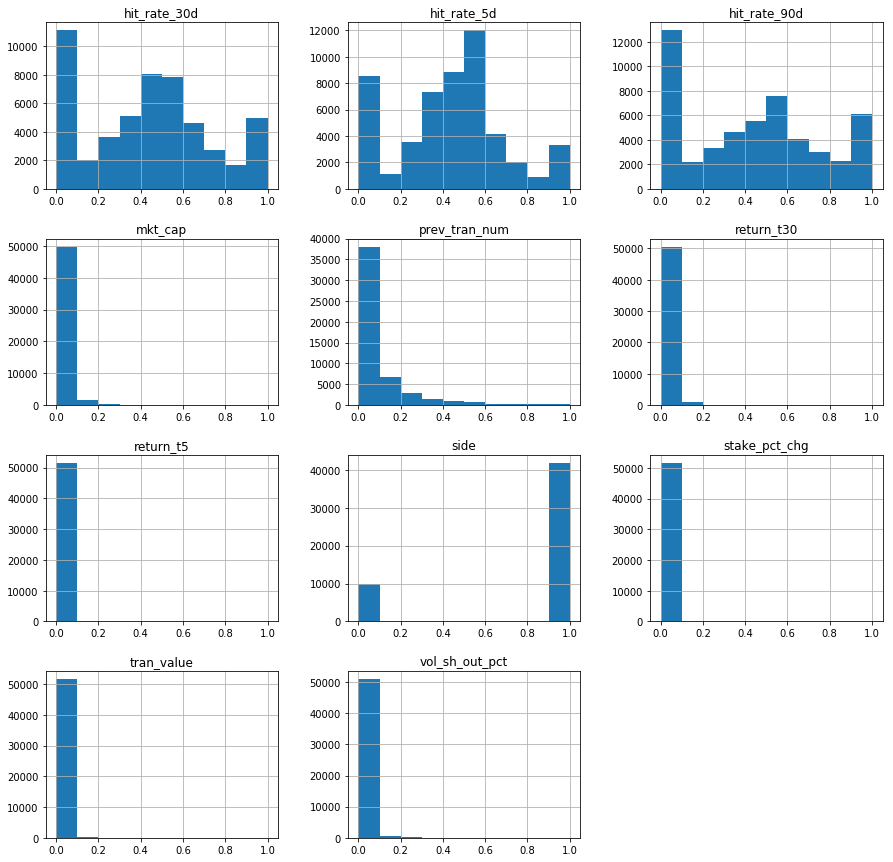

In [10]:
df[col_list].hist(figsize = [15,15])

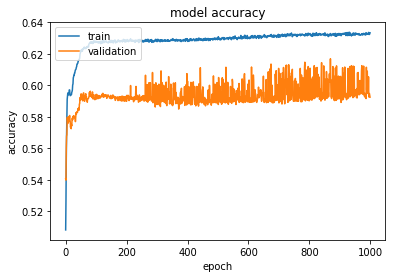

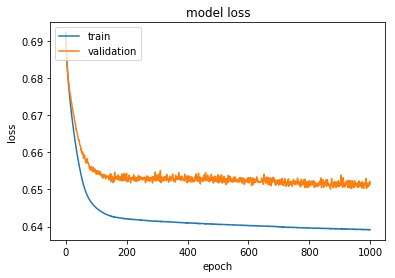

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# evaluate the model
scores = model.evaluate(X_train, y_train_30d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_30d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 15us/step
[Train] acc: 62.43%
17240/17240 [==============================] - 0s 15us/step
[Test] acc: 59.77%
